In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from catboost import CatBoostClassifier, Pool
import time
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

import wandb
from wandb.lightgbm import wandb_callback

pd.set_option("display.max_columns", 181)
pd.set_option("display.min_rows", 200)

In [3]:
train_catboost_1 = pd.read_csv('TRAIN_CatBoost_grid_search_1700_epochs.csv')
train_catboost_new_features = pd.read_csv('TRAIN_CatBoost_new_features_rand_search_2500_epochs.csv')
train_keras = pd.read_csv('TRAIN_Keras_29_epochs.csv')
train_lgbm = pd.read_csv('TRAIN_lgbm_features2020.csv')

solution_catboost_1 = pd.read_csv('SOLUTION_CatBoost_grid_search_1700_epochs.csv')
solution_catboost_new_features = pd.read_csv('SOLUTION_CatBoost_new_features_rand_search_2500_epochs.csv')
solution_keras = pd.read_csv('SOLUTION_Keras_29_epochs.csv')
solution_lgbm = pd.read_csv('SOLUTION_lgbm_features2020.csv')

In [4]:
# train_df = pd.DataFrame(train_catboost_1['pred'])
#train_df.columns=['catboost_1']

train_df = pd.DataFrame(train_catboost_new_features['pred'])
# train_df['catboost_new_features'] = train_catboost_new_features['pred']
# train_df['keras'] = train_keras['pred']
train_df['lgbm'] = train_lgbm['pred']

train_df.head()
train_df.columns = ['catboost', 'lgbm']


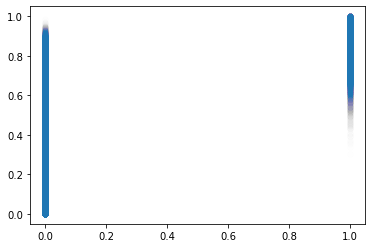

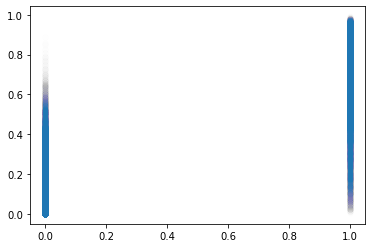

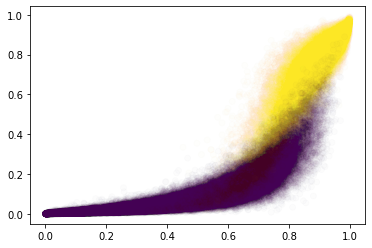

In [5]:
corrs = train_df.copy()
corrs['y'] = train_lgbm.diabetes_mellitus

plt.scatter(corrs.y, corrs.lgbm, alpha=0.002)
plt.show()
#plt.scatter(corrs.y, corrs.catboost_1, alpha=0.005)
#plt.show()
plt.scatter(corrs.y, corrs.catboost, alpha=0.002)
plt.show()
plt.scatter(corrs.lgbm, corrs.catboost, alpha=0.01, c=corrs.y)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

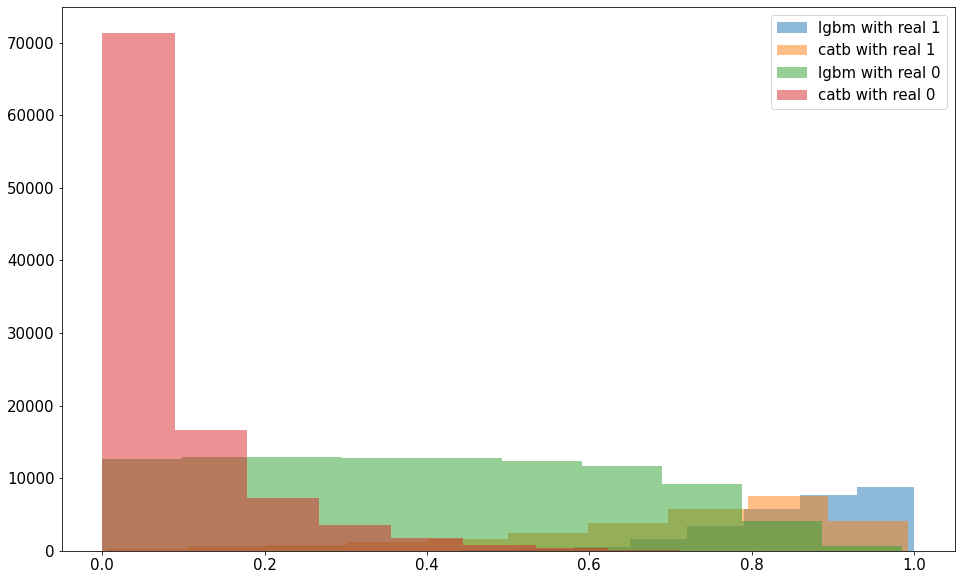

In [6]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams.update({'font.size': 15})

plt.hist(corrs.loc[corrs.y==1,'lgbm'], alpha=0.5, label='lgbm with real 1')
plt.hist(corrs.loc[corrs.y==1,'catboost'], alpha=0.5,  label='catb with real 1')
plt.hist(corrs.loc[corrs.y==0,'lgbm'], alpha=0.5,  label='lgbm with real 0')
plt.hist(corrs.loc[corrs.y==0,'catboost'], alpha=0.5, label='catb with real 0')
plt.legend()
plt.show

In [7]:
test_df = pd.DataFrame(solution_catboost_1['diabetes_mellitus'])
#test_df.columns=['catboost_1']

test_df['catboost'] = solution_catboost_new_features['diabetes_mellitus']
# test_df['keras'] = solution_keras['diabetes_mellitus']
test_df['lgbm'] = solution_lgbm['diabetes_mellitus']

test_df.head()

test_df = test_df.drop('diabetes_mellitus',axis=1)

In [8]:
test_df.shape

(10234, 2)

In [28]:
X_train, X_val, y_train, y_val = train_test_split(train_df, train_catboost_1.diabetes_mellitus, test_size=0.98, random_state=42,shuffle=True )


In [ ]:
X_val, y_val

In [56]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
pred_proba = clf.predict_proba(test_df.values)[:,1]

In [109]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(5).fit(X_train, y_train)
pred_proba = clf.predict_proba(test_df.values)[:,1]


In [29]:
from sklearn.gaussian_process import GaussianProcessClassifier

clf = GaussianProcessClassifier(1.0 * RBF(1.0)).fit(X_train, y_train)
pred_proba = clf.predict_proba(test_df.values)[:,1]


In [110]:
# from sklearn.svm import SVC
# # from sklearn.model_selection import cross_val_score

# clf = SVC(random_state=0, kernel='linear')
# clf.fit(X_train, y_train)

# pred_proba = clf.predict(test_df.values)

# # clf = DecisionTreeClassifier(random_state=0,max_depth=1)
# # cross_val_score(clf, X_train,y_train, cv=10)

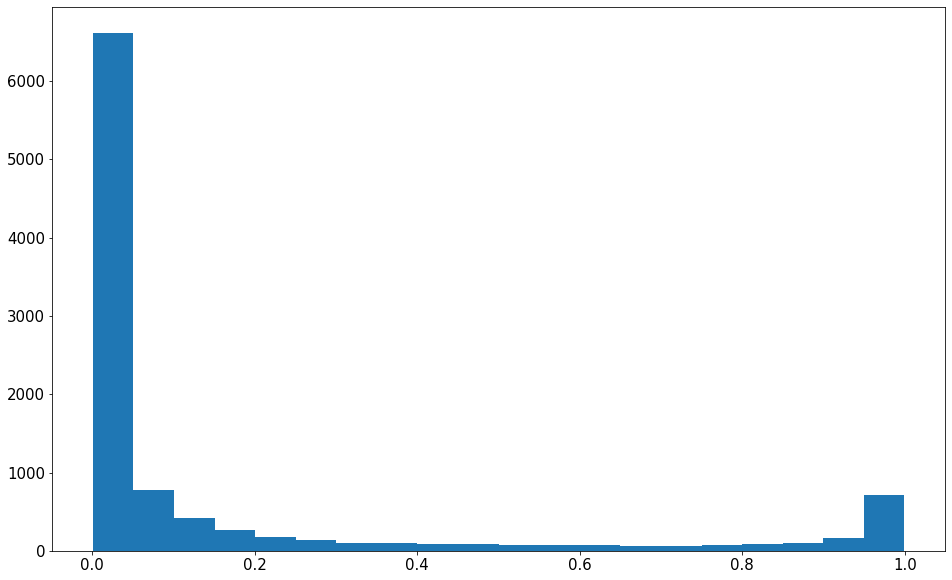

In [30]:
plt.hist(pred_proba,20)
plt.show()

In [ ]:
pred_proba

In [31]:
submittion = pd.DataFrame([solution_catboost_1.encounter_id,pred_proba]).T
submittion.columns = ['encounter_id', 'diabetes_mellitus']
submittion.encounter_id = submittion.encounter_id.astype('int32')
submittion.set_index('encounter_id',inplace=True)
submittion.to_csv('SOLUTION_ensemble_GP.csv')

In [26]:
X_train.shape

(650, 2)

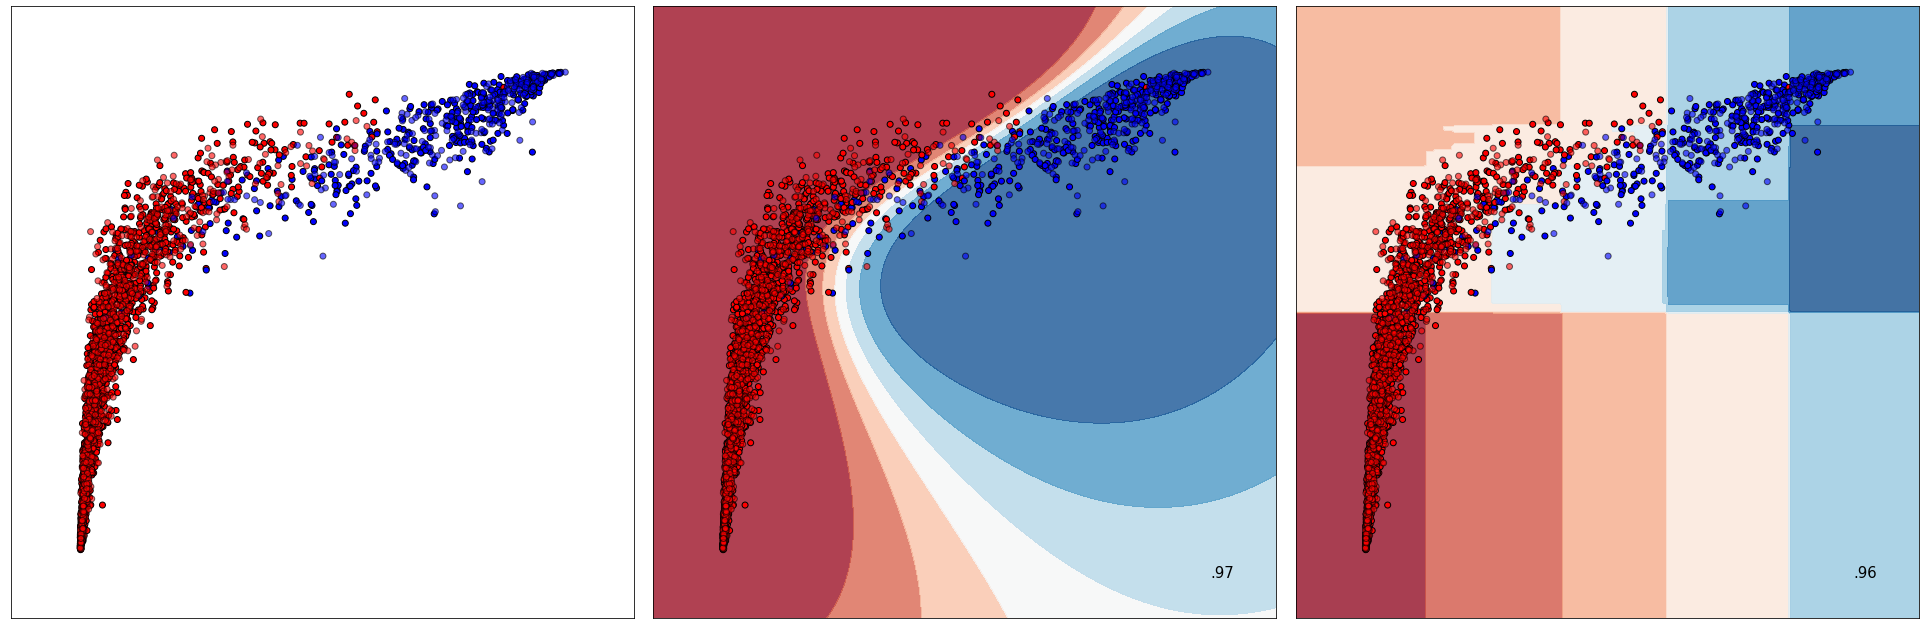

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

names = ["Nearest Neighbors", "Linear SVM", "QDA"]

classifiers = [
    KNeighborsClassifier(21),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

classifiers = [
#     KNeighborsClassifier(21,weights='distance'),
#     SVC(kernel="linear", C=0.025),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
#     GaussianNB(),
    AdaBoostClassifier()
    ]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)



rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
# preprocess dataset, split into training and test part
# X, y = ds

X = X_train
y = y_train

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, len(classifiers) + 1, i)
# if ds_cnt == 0:
#     ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
#     if ds_cnt == 0:
#         ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

In [ ]:
import shap

# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X_train)



In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

In [ ]:
(avg_solution.diabetes_mellitus.values*solution_catboost_new_features.diabetes_mellitus.values)**.5

In [ ]:
avg_solution = solution_lgbm.copy()
#avg_solution.diabetes_mellitus = (2*avg_solution.diabetes_mellitus + 1*solution_catboost_new_features.diabetes_mellitus) / 3
#avg_solution.loc[(avg_solution.diabetes_mellitus - solution_catboost_new_features.diabetes_mellitus) > 0.5, 'diabetes_mellitus'] = solution_catboost_new_features.diabetes_mellitus[(avg_solution.diabetes_mellitus - solution_catboost_new_features.diabetes_mellitus) > 0.5]
#avg_solution.loc[avg_solution.diabetes_mellitus > 0.4, 'diabetes_mellitus'] =  (avg_solution.loc[avg_solution.diabetes_mellitus > 0.4, 'diabetes_mellitus'] +  solution_catboost_new_features.loc[avg_solution.diabetes_mellitus > 0.4, 'diabetes_mellitus'])/2
avg_solution['diabetes_mellitus'] = (avg_solution.diabetes_mellitus*avg_solution.diabetes_mellitus + solution_catboost_new_features.diabetes_mellitus*(1-solution_catboost_new_features.diabetes_mellitus))/(1-solution_catboost_new_features.diabetes_mellitus+avg_solution.diabetes_mellitus)

#avg_solution['diabetes_mellitus'] = (avg_solution.diabetes_mellitus.values*solution_catboost_new_features.diabetes_mellitus.values)**.5
avg_solution.set_index('encounter_id',inplace=True)

avg_solution

In [ ]:
#avg_solution.set_index('encounter_id',inplace=True)
avg_solution.to_csv('SOLUTION_weighted_prob_avg_sol_catboost_new_features_lgbm.csv')